connecting to google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the dataset

In [3]:
import pandas as pd
csv_path = '/content/drive/MyDrive/pip/Scope3_emissions_dataset.csv'
df = pd.read_csv(csv_path)

Data preprocessing

In [4]:
df.head()

,Order_No,Supplier_Name,Created,Commodity_Name,Commodity_Description,Supply_Chain_Emission_Factors,Quantity,Total_Price,Place_of_Receipt,Destination,Mode_of_Transport,Fuel Type,Distance(km),Total_CO2_Emissions
0,P1005539,SOLIDENERGY AS,8/27/2020,Water Pump,UHP-PUMPE-2000-BAR,0.189,1,1274230,Middlesbrough,Norway,Air,Aviation Fuel,2214.6,418.5594
1,P1005539,SOLIDENERGY AS,5/4/2021,Water Pump,UHP-PUMPE-2000-BAR,0.189,1,1274230,Chicago,Norway,Air,Aviation Fuel,6355.0,1201.0950
2,P1003270,NUOVO PIGNONE INTERNATIONAL S.R.L.,8/7/2020,Main turbine generator,MAIN TURBINE GENERATOR,0.226,1,2098615,Abu Dabi,Norway,Air,Aviation Fuel,7442.6,1682.0276
3,P1005539,SOLIDENERGY AS,3/17/2021,Water Pump,UHP-PUMPE-2000-BAR,0.189,1,1274230,Indonesia,Norway,Air,Aviation Fuel,10917.0,2063.3130
4,P1005675-1,EUREKA PUMPS AS,8/17/2020,Water Pump,Fire Water Pump,0.746,1,1274230,Abu Dabi,Norway,Air,Aviation Fuel,7442.6,5552.1796


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order_No                       57 non-null     object 
 1   Supplier_Name                  57 non-null     object 
 2   Created                        57 non-null     object 
 3   Commodity_Name                 57 non-null     object 
 4   Commodity_Description          57 non-null     object 
 5   Supply_Chain_Emission_Factors  57 non-null     float64
 6   Quantity                       57 non-null     int64  
 7   Total_Price                    57 non-null     object 
 8   Place_of_Receipt               57 non-null     object 
 9   Destination                    57 non-null     object 
 10  Mode_of_Transport              57 non-null     object 
 11  Fuel Type                      57 non-null     object 
 12  Distance(km)                   57 non-null     float

Feature Selection

In [6]:
data_feature = df.iloc[:, [1,3,5,6,10,11,12]]
data_feature.head()

,Supplier_Name,Commodity_Name,Supply_Chain_Emission_Factors,Quantity,Mode_of_Transport,Fuel Type,Distance(km)
0,SOLIDENERGY AS,Water Pump,0.189,1,Air,Aviation Fuel,2214.6
1,SOLIDENERGY AS,Water Pump,0.189,1,Air,Aviation Fuel,6355.0
2,NUOVO PIGNONE INTERNATIONAL S.R.L.,Main turbine generator,0.226,1,Air,Aviation Fuel,7442.6
3,SOLIDENERGY AS,Water Pump,0.189,1,Air,Aviation Fuel,10917.0
4,EUREKA PUMPS AS,Water Pump,0.746,1,Air,Aviation Fuel,7442.6


In [7]:
col = ['Supplier_Name','Commodity_Name','Mode_of_Transport','Fuel Type']
for i in col:
  unique_values = df[i].unique()
  print(f'{i}:{unique_values}\n')

Supplier_Name:['SOLIDENERGY AS' 'NUOVO PIGNONE INTERNATIONAL S.R.L.' 'EUREKA PUMPS AS'
 'EMERSON AUTOMATION SOLUTIONS AS' 'KAEFER ENERGY AS'
 'CONSTRUCTION ET PROCEDES' 'TECHNIP FRANCE SAS' 'IKM TESTING AS'
 'GENERAL INDUSTRY SYSTEMS AS' 'NDT NORDIC AS'
 'BLUEWATER ENERGY SERVICES B.V.' 'MMSA' 'ONNINEN AS']

Commodity_Name:['Water Pump' 'Main turbine generator' 'Battery' 'Conveyor belts'
 'PIPE, FITTINGS & SPOOLS']

Mode_of_Transport:['Air' 'Road' 'Water']

Fuel Type:['Aviation Fuel' 'CNG' 'Diesel' 'Electric' 'Jet fuel' 'Kerosene' 'LNG'
 'Petrol' 'Residual Fuel Oil']



Label Encoding the categorical data
and saving the encoders as a .pkl file


In [10]:
import pickle
from sklearn.preprocessing import LabelEncoder
# icol=[0,1,4,5]
data = data_feature.values

# ENCODING SUPPLIER COLUMN
encoder0=LabelEncoder()
data[:,0]=encoder0.fit_transform(data[:,0])
with open("/content/drive/MyDrive/pip/Encoders/encoder_supply.pkl", "wb") as file:
    pickle.dump(encoder0, file)


# ENCODING COMMODITY COLUMN
encoder1=LabelEncoder()
data[:,1]=encoder1.fit_transform(data[:,1])
with open("/content/drive/MyDrive/pip/Encoders/encoder_commodity.pkl", "wb") as file:
    pickle.dump(encoder1, file)

#ENCODING TRANSPORT COLUMN
encoder4=LabelEncoder()
data[:,4]=encoder4.fit_transform(data[:,4])
with open("/content/drive/MyDrive/pip/Encoders/encoder_transport.pkl", "wb") as file:
    pickle.dump(encoder4, file)

#ENCODING FUEL COLUMN
encoder5=LabelEncoder()
data[:,5]=encoder5.fit_transform(data[:,5])
with open("/content/drive/MyDrive/pip/Encoders/encoder_fuel.pkl", "wb") as file:
    pickle.dump(encoder5, file)

data


array([[11, 4, 0.189, 1, 0, 0, 2214.6],
       [11, 4, 0.189, 1, 0, 0, 6355.0],
       [9, 2, 0.226, 1, 0, 0, 7442.6],
       [11, 4, 0.189, 1, 0, 0, 10917.0],
       [3, 4, 0.746, 1, 0, 0, 7442.6],
       [2, 0, 0.565, 1, 0, 0, 7863.0],
       [9, 2, 0.283, 1, 1, 1, 2214.6],
       [9, 2, 0.224, 1, 1, 1, 16077.0],
       [3, 4, 0.765, 1, 1, 1, 16077.0],
       [11, 4, 0.182, 1, 2, 2, 1256.4],
       [6, 4, 0.223, 1, 1, 2, 1828.0],
       [11, 4, 0.189, 1, 1, 2, 7344.0],
       [3, 4, 0.866, 1, 2, 2, 2214.6],
       [9, 2, 0.27, 1, 1, 2, 7344.0],
       [9, 2, 0.298, 1, 2, 2, 7863.0],
       [1, 2, 0.26, 1, 1, 2, 10917.0],
       [9, 2, 0.317, 1, 2, 2, 10917.0],
       [9, 2, 0.283, 1, 1, 3, 1828.0],
       [6, 4, 0.223, 1, 1, 3, 6355.0],
       [12, 0, 0.546, 3, 1, 3, 1256.4],
       [5, 4, 0.189, 1, 1, 3, 16077.0],
       [12, 0, 0.546, 2, 1, 3, 7442.6],
       [11, 4, 0.189, 1, 0, 4, 1828.0],
       [11, 1, 0.297, 1, 0, 4, 2214.6],
       [11, 4, 0.189, 1, 0, 4, 7863.0],
       [11,

In [11]:
data_feature.iloc[:, :] = data
data_feature.tail()

<ipython-input-11-e9f4eb9443a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_feature.iloc[:, :] = data
<ipython-input-11-e9f4eb9443a1>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_feature.iloc[:, :] = data


,Supplier_Name,Commodity_Name,Supply_Chain_Emission_Factors,Quantity,Mode_of_Transport,Fuel Type,Distance(km)
52,3,4,0.183,1,2,8,7442.6
53,11,1,0.313,1,2,8,7344.0
54,9,3,0.326,1,2,8,9172.0
55,3,4,0.746,1,2,8,7863.0
56,12,2,0.546,5,2,8,7344.0


Target selection

In [8]:
data_target = df.iloc[:,[13]]
data_target.head()

,Total_CO2_Emissions
0,418.5594
1,1201.0950
2,1682.0276
3,2063.3130
4,5552.1796


Correlation and heatmap

correlation with Total_CO2_Emissions:
 Supplier_Name                   -0.164378
Commodity_Name                  -0.229914
Supply_Chain_Emission_Factors    0.427722
Quantity                         0.719556
Mode_of_Transport                0.107127
Fuel Type                        0.199506
Distance(km)                     0.282542
dtype: float64


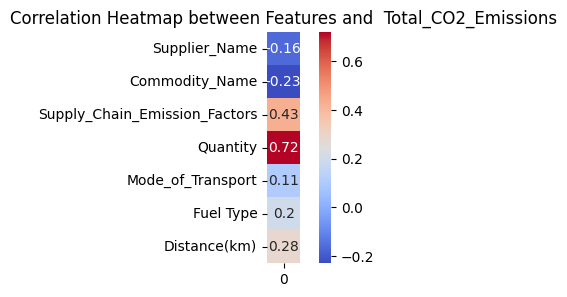

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between 'Target_Column' and other numeric columns in 'data'
correlation = data_feature.corrwith(data_target['Total_CO2_Emissions'])
# Display the correlation values
print('correlation with Total_CO2_Emissions:\n',correlation)

# Create a heatmap using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap between Features and  Total_CO2_Emissions")
plt.show()

Splitting the dataset in 9:1 ratio

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data_feature
y = data_target['Total_CO2_Emissions']

# Assuming you have X (features) and y (target) as your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

Model trainning

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Random Forest Regressor with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=60)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

In [44]:
y_pred

array([ 1641.22745 ,   631.466168,  1988.52591 ,  6298.765694,
       19909.712176,  2462.248606])

Evaluation matrix

In [45]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Absolute Error: 1074.948969999997
Mean Squared Error: 4563015.190447572
R-squared: 0.9378802148087225


Saving the model as .pkl file

In [46]:
import os
import joblib

model_path = '/content/drive/MyDrive/pip/random-forest-model.pkl'
joblib.dump(rf_regressor, model_path)

['/content/drive/MyDrive/pip/random-forest-model.pkl']

check model with diffrent Scenario

In [51]:
a = X.copy()
a['Quantity'] = a['Quantity']+2
a.head()

,Supplier_Name,Commodity_Name,Supply_Chain_Emission_Factors,Quantity,Mode_of_Transport,Fuel Type,Distance(km)
0,11,4,0.189,3,0,0,2214.6
1,11,4,0.189,3,0,0,6355.0
2,9,2,0.226,3,0,0,7442.6
3,11,4,0.189,3,0,0,10917.0
4,3,4,0.746,3,0,0,7442.6


   Supplier_Name  Commodity_Name  Supply_Chain_Emission_Factors  Quantity  \
0             11               4                          0.189         1   
1             11               4                          0.189         1   
2              9               2                          0.226         1   
3             11               4                          0.189         1   
4              3               4                          0.746         1   

   Mode_of_Transport  Fuel Type  Distance(km)  Original_CO2_Emissions  \
0                  0          0        2214.6                418.5594   
1                  0          0        6355.0               1201.0950   
2                  0          0        7442.6               1682.0276   
3                  0          0       10917.0               2063.3130   
4                  0          0        7442.6               5552.1796   

   Scenario1_CO2_Emissions  Scenario2_CO2_Emissions  
0              4456.646046               382

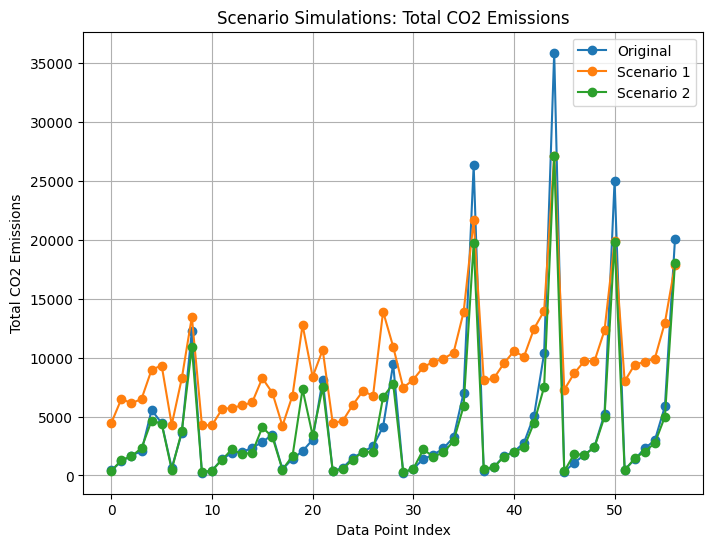

In [59]:
model = rf_regressor
# Define the scenarios with hypothetical changes to input features
# For example, let's consider two scenarios:
# Scenario 1: Increase the Quantity by 5 units
# Scenario 2: Decrease the Distance by 15%
scenario1 = X.copy()
scenario1['Quantity'] = scenario1['Quantity'] + 2

scenario2 = X.copy()
scenario2['Distance(km)'] = scenario2['Distance(km)'] * 0.85

# Predict Total_CO2_Emissions for each scenario
total_co2_emissions_scenario1 = model.predict(scenario1)
total_co2_emissions_scenario2 = model.predict(scenario2)

# Combine the scenarios with the original data for visualization
scenarios_data = pd.concat([X, pd.Series(y, name='Original_CO2_Emissions'),
                            pd.Series(total_co2_emissions_scenario1, name='Scenario1_CO2_Emissions'),
                            pd.Series(total_co2_emissions_scenario2, name='Scenario2_CO2_Emissions')], axis=1)

# Print the results for each scenario
print(scenarios_data.head())


# You can also create visualizations to compare the scenarios
# For example, using matplotlib:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(scenarios_data.index, scenarios_data['Original_CO2_Emissions'], label='Original', marker='o')
plt.plot(scenarios_data.index, scenarios_data['Scenario1_CO2_Emissions'], label='Scenario 1', marker='o')
plt.plot(scenarios_data.index, scenarios_data['Scenario2_CO2_Emissions'], label='Scenario 2', marker='o')
plt.xlabel('Data Point Index')
plt.ylabel('Total CO2 Emissions')
plt.title('Scenario Simulations: Total CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()

checking the model with user data

In [60]:
import pandas as pd
import numpy as np
user_data = ['SOLIDENERGY AS', 'Water Pump', 0.189, 1, 'Air', 'Aviation Fuel', 2214.6]
a = np.array([user_data])
a[:,0]=encoder0.transform(a[:,0])
a[:,1]=encoder1.transform(a[:,1])
a[:,4]=encoder4.transform(a[:,4])
a[:,5]=encoder5.transform(a[:,5])

co2_emission = rf_regressor.predict(a)
co2_emission

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([449.316542])

creating form for user input

In [62]:
pip install colorama

In [64]:
import numpy as np
from colorama import Fore, Style
import joblib
from sklearn.preprocessing import LabelEncoder


def predict_emission(inputs):
    # inputs = inputs.reshape(1, -1)
    return model.predict(inputs)
# Supplier_Name	Commodity_Name	Supply_Chain_Emission_Factors	Quantity	Mode_of_Transport	Fuel Type	Distance(km)

def main():
    try:
        while True:
            print("Enter the input values:")
            supplier_name = input("Supplier Name: ")
            commodity_name = input("Commodity Name: ")
            Supply_Chain_Emission_Factors = float(input("Supply_Chain_Emission_Factors: "))
            quantity = float(input("Quantity: "))
            mode_of_transport = input("Mode of Transport: ")
            fuel_type = input("Fuel Type: ")
            distance_km = float(input("Distance (km): "))

            data = [supplier_name,	commodity_name,	Supply_Chain_Emission_Factors,	quantity,	mode_of_transport,	fuel_type,	distance_km]
            a = np.array([data])
            a[:,0]=encoder0.transform(a[:,0])
            a[:,1]=encoder1.transform(a[:,1])
            a[:,4]=encoder4.transform(a[:,4])
            a[:,5]=encoder5.transform(a[:,5])

            encode_data = a

            predicted_emission = predict_emission(encode_data)

            print(Fore.GREEN + f"Predicted Emission: {predicted_emission}" + Style.RESET_ALL)

    except KeyboardInterrupt:
        print("\nExiting the program.")

if __name__ == "__main__":
    main()


Enter the input values:
Supplier Name: SOLIDENERGY AS
Commodity Name: Water Pump
Supply_Chain_Emission_Factors: 0.189
Quantity: 1
Mode of Transport: Air
Fuel Type: Aviation Fuel
Distance (km): 2214.6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Emission: [449.316542]
Enter the input values:

Exiting the program.


Data analysis for the UI part

In [66]:
#unique values for each features
col = ['Supplier_Name','Commodity_Name','Mode_of_Transport','Fuel Type']
for i in col:
  unique_values = df[i].unique()
  print(f'{i}:{unique_values}\n')

Supplier_Name:['SOLIDENERGY AS' 'NUOVO PIGNONE INTERNATIONAL S.R.L.' 'EUREKA PUMPS AS'
 'EMERSON AUTOMATION SOLUTIONS AS' 'KAEFER ENERGY AS'
 'CONSTRUCTION ET PROCEDES' 'TECHNIP FRANCE SAS' 'IKM TESTING AS'
 'GENERAL INDUSTRY SYSTEMS AS' 'NDT NORDIC AS'
 'BLUEWATER ENERGY SERVICES B.V.' 'MMSA' 'ONNINEN AS']

Commodity_Name:['Water Pump' 'Main turbine generator' 'Battery' 'Conveyor belts'
 'PIPE, FITTINGS & SPOOLS']

Mode_of_Transport:['Air' 'Road' 'Water']

Fuel Type:['Aviation Fuel' 'CNG' 'Diesel' 'Electric' 'Jet fuel' 'Kerosene' 'LNG'
 'Petrol' 'Residual Fuel Oil']



In [67]:
grouped_supplier = df.groupby('Supplier_Name').agg({
    'Commodity_Name': 'unique',
    'Mode_of_Transport': 'unique',
    'Fuel Type': 'unique'
}).reset_index()
grouped_supplier

,Supplier_Name,Commodity_Name,Mode_of_Transport,Fuel Type
0,BLUEWATER ENERGY SERVICES B.V.,[Battery],[Water],[LNG]
1,CONSTRUCTION ET PROCEDES,[Main turbine generator],[Road],[Diesel]
2,EMERSON AUTOMATION SOLUTIONS AS,[Battery],[Air],[Aviation Fuel]
3,EUREKA PUMPS AS,[Water Pump],"[Air, Road, Water]","[Aviation Fuel, CNG, Diesel, Jet fuel, Kerosen..."
4,GENERAL INDUSTRY SYSTEMS AS,[Battery],[Air],[Jet fuel]
5,IKM TESTING AS,[Water Pump],[Road],[Electric]
6,KAEFER ENERGY AS,[Water Pump],"[Road, Air, Water]","[Diesel, Electric, Kerosene, LNG, Petrol, Resi..."
7,MMSA,"[PIPE, FITTINGS & SPOOLS]",[Road],[Petrol]
8,NDT NORDIC AS,[Water Pump],[Water],[LNG]
9,NUOVO PIGNONE INTERNATIONAL S.R.L.,"[Main turbine generator, Water Pump, PIPE, FIT...","[Air, Road, Water]","[Aviation Fuel, CNG, Diesel, Electric, Kerosen..."


In [68]:
grouped_commodity = df.groupby('Commodity_Name').agg({
    'Supplier_Name': 'unique',
    'Mode_of_Transport': 'unique',
    'Fuel Type': 'unique'
}).reset_index()
grouped_commodity

,Commodity_Name,Supplier_Name,Mode_of_Transport,Fuel Type
0,Battery,"[EMERSON AUTOMATION SOLUTIONS AS, TECHNIP FRAN...","[Air, Road, Water]","[Aviation Fuel, Electric, Jet fuel, Kerosene, ..."
1,Conveyor belts,[SOLIDENERGY AS],"[Air, Water]","[Jet fuel, Kerosene, LNG, Residual Fuel Oil]"
2,Main turbine generator,"[NUOVO PIGNONE INTERNATIONAL S.R.L., CONSTRUCT...","[Air, Road, Water]","[Aviation Fuel, CNG, Diesel, Electric, Petrol,..."
3,"PIPE, FITTINGS & SPOOLS","[MMSA, ONNINEN AS, NUOVO PIGNONE INTERNATIONAL...","[Road, Water]","[Petrol, Residual Fuel Oil]"
4,Water Pump,"[SOLIDENERGY AS, EUREKA PUMPS AS, KAEFER ENERG...","[Air, Road, Water]","[Aviation Fuel, CNG, Diesel, Electric, Jet fue..."


In [82]:
for commodity, supplier in df.groupby('Commodity_Name')['Supplier_Name'].unique().items():
    print(f"commodity: {commodity}")
    print(f"Associated supplier: {', '.join(supplier)}")
    print()

commodity: Battery
Associated supplier: EMERSON AUTOMATION SOLUTIONS AS, TECHNIP FRANCE SAS, GENERAL INDUSTRY SYSTEMS AS, BLUEWATER ENERGY SERVICES B.V.

commodity: Conveyor belts
Associated supplier: SOLIDENERGY AS

commodity: Main turbine generator
Associated supplier: NUOVO PIGNONE INTERNATIONAL S.R.L., CONSTRUCTION ET PROCEDES, TECHNIP FRANCE SAS

commodity: PIPE, FITTINGS & SPOOLS
Associated supplier: MMSA, ONNINEN AS, NUOVO PIGNONE INTERNATIONAL S.R.L.

commodity: Water Pump
Associated supplier: SOLIDENERGY AS, EUREKA PUMPS AS, KAEFER ENERGY AS, IKM TESTING AS, NUOVO PIGNONE INTERNATIONAL S.R.L., NDT NORDIC AS



In [83]:
for supplier, commodity in df.groupby('Supplier_Name')['Commodity_Name'].unique().items():
    print(f"supplier: {supplier}")
    print(f"Associated commodities: {', '.join(commodity)}")
    print()

supplier: BLUEWATER ENERGY SERVICES B.V.
Associated commodities: Battery

supplier: CONSTRUCTION ET PROCEDES
Associated commodities: Main turbine generator

supplier: EMERSON AUTOMATION SOLUTIONS AS
Associated commodities: Battery

supplier: EUREKA PUMPS AS
Associated commodities: Water Pump

supplier: GENERAL INDUSTRY SYSTEMS AS
Associated commodities: Battery

supplier: IKM TESTING AS
Associated commodities: Water Pump

supplier: KAEFER ENERGY AS
Associated commodities: Water Pump

supplier: MMSA
Associated commodities: PIPE, FITTINGS & SPOOLS

supplier: NDT NORDIC AS
Associated commodities: Water Pump

supplier: NUOVO PIGNONE INTERNATIONAL S.R.L.
Associated commodities: Main turbine generator, Water Pump, PIPE, FITTINGS & SPOOLS

supplier: ONNINEN AS
Associated commodities: PIPE, FITTINGS & SPOOLS

supplier: SOLIDENERGY AS
Associated commodities: Water Pump, Conveyor belts

supplier: TECHNIP FRANCE SAS
Associated commodities: Battery, Main turbine generator



In [84]:
for supplier, transport in df.groupby('Supplier_Name')['Mode_of_Transport'].unique().items():
    print(f"supplier: {supplier}")
    print(f"Associated mode of transport: {', '.join(transport)}")
    print()

supplier: BLUEWATER ENERGY SERVICES B.V.
Associated mode of transport: Water

supplier: CONSTRUCTION ET PROCEDES
Associated mode of transport: Road

supplier: EMERSON AUTOMATION SOLUTIONS AS
Associated mode of transport: Air

supplier: EUREKA PUMPS AS
Associated mode of transport: Air, Road, Water

supplier: GENERAL INDUSTRY SYSTEMS AS
Associated mode of transport: Air

supplier: IKM TESTING AS
Associated mode of transport: Road

supplier: KAEFER ENERGY AS
Associated mode of transport: Road, Air, Water

supplier: MMSA
Associated mode of transport: Road

supplier: NDT NORDIC AS
Associated mode of transport: Water

supplier: NUOVO PIGNONE INTERNATIONAL S.R.L.
Associated mode of transport: Air, Road, Water

supplier: ONNINEN AS
Associated mode of transport: Road

supplier: SOLIDENERGY AS
Associated mode of transport: Air, Water, Road

supplier: TECHNIP FRANCE SAS
Associated mode of transport: Road, Air, Water



In [85]:
for mode_of_transport, fuel_type in df.groupby('Mode_of_Transport')['Fuel Type'].unique().items():
    print(f"mode of transport: {mode_of_transport}")
    print(f"Associated fuel type: {', '.join(fuel_type)}")
    print()

mode of transport: Air
Associated fuel type: Aviation Fuel, Jet fuel, Kerosene

mode of transport: Road
Associated fuel type: CNG, Diesel, Electric, Petrol

mode of transport: Water
Associated fuel type: Diesel, LNG, Residual Fuel Oil

